In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

In [ ]:
data = fetch_california_housing()
df = pd.DataFrame(data.data,columns=data.feature_names)
df['MedHouseVal'] = data.target

In [ ]:
print(f"Shape: {df.shape}")
print(f"Column names:  {list(df.columns)}")
print(f"Dateset structure: {df.describe}")

In [ ]:
fix, axes = plt.subplots(3,3, figsize=(15,10))
plt.suptitle('California Housing', fontsize=16, fontweight='bold')

for ax,col in zip(axes.flatten(), df.columns):
    df[col].hist(bins=30,ax=ax, alpha=0.7, edgecolor='black')
    ax.axvline(df[col].mean(), label='Mean', color='red', linestyle='--')
    ax.axvline(df[col].median(), label='Median' ,color='green', linestyle='--')
    ax.legend()
    ax.set_title(f'{col} Distribution')



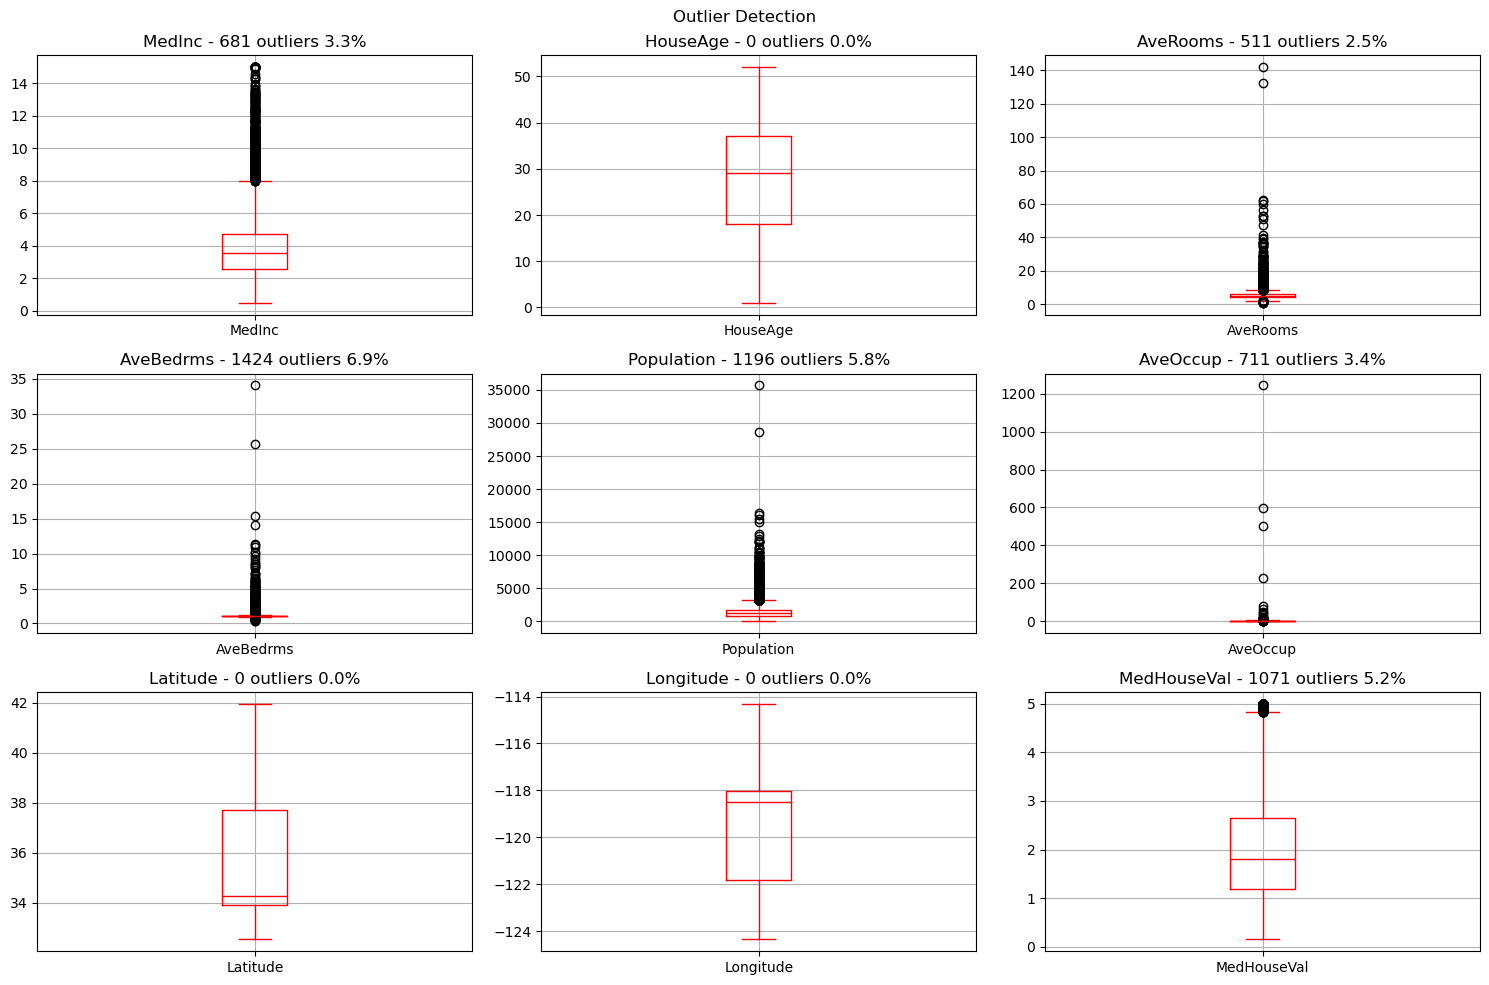

In [10]:
fig,axes = plt.subplots(3,3,figsize=(15,10))
plt.suptitle('Outlier Detection')

for ax,col in zip(axes.flatten(),df.columns):
    df.boxplot(column=col,ax=ax, color='red')
    q1,q3 = df[col].quantile([0.25,0.75])
    iqr=q3-q1
    outliers = df[(df[col] < q1-1.5*iqr) | (df[col] > q3+1.5*iqr)]
    ax.set_title(f"{col} - {len(outliers)} outliers {len(outliers)/len(df):.1%}")

plt.tight_layout()
